# Table of contents
1. [Introduction](#introduction)
2. [Decomposition and breakdown](#decomposition)
    1. [Flowchart](#flowchart)
    2. [Pseudocode](#pseudo)
4. [Extraction & Analysis of Data](#analysisandextracting)
    1. [Extracting Data from CSV](#extracting)
    2. [Analysis of Data Given](#analysis)
5. [Design of Algorithm](#design)
    1. [Sorting Priorities](#priorities)
    2. [Group Sizes](#sizes)
    3. [Brainstorming: Individual Modular Diversification of Factors](#modular)
        1. [Considering School Frequency: Diversifying School](#school)
        2. [Buckets & Cyclic Round-Robin: Diversifying CGPA](#cgpa)
        3. [Diversifying Gender](#gender)
6. [Sorting Algorithm](#algo)
7. [Converting Back & Post-Analysis](#post)
8. [Algorithm Evaluation: Diversity Index](#seven)
    1. [Finding the diversity of a single factor of a single group](#sevenone)
        1. [CGPA case](#sevenoneone)
    2. [Calculating the factors for each group](#seventwo)
    3. [Calculating for every tutorial group](#seventhree)
    4. [Printing all the factors and finding the least diverse overall with regards to composition of tutorial group](#sevenfour)
        1. [Finding Theoretical best school distribution when disregarding other factors](#sevenfourone)
        2. [Calculating gender ratio of every TG group for comparison later](#sevenfourtwo)
    5. [Combining everything for the final result](#sevenfive)
9. [Graphical Plots](#plots)
    1. [Interpretation of Plots](#interp)
10. [Challenges & Issues](#challenges)
11. [Conclusion](#conc)

# 1) Introduction <a id="introduction"></a>
Group members:
- Chaehui Kim (M250132)
- Eugene Phang (EPHANG002)
- Abhinav Kiran Korety (ABHINAVK001)
- Kwan Wei Yin Joel (KWAN0077)
- Daniel Sutjipto (DANI0064)

# 2) Decomposition and breakdown <a id="decomposition"></a>



## Decomposition process

We decided to decompose the problem into subproblems that can be done individually without needing much input from the rest of the problem, as this allows for easy splitting of tasks.
We identified the following subproblems that fit into this criteria:
- Extraction and creation of CSV
- Analysis of data and graphs
- Sorting algorithm
- Algorithm evaluation algorithm

Within each of the subproblems, we then broke the problem down even more by ourselves, getting input from those doing other groups if need be.
<br>
For example, the algorithm evaluation and sorting algorithm have a common point in choosing factors to prioritise and defining diversity. While this can be done independantly, it made more sense to discuss and solve it together once than to do it twice individually with different answers. Tackling the issue from each of our own perspectives focused on our own problems also brought up more perspectives.
<br>
The data structure for the data of students was also a common point between all subproblems, so we discussed that as well and settled on a compromise of having it be effective across all subproblems instead of overwhelmingly in favour of only one.

## 2.1) Flowchart <a id="flowchart"></a>

![flowchart](assets/Flowchart2.png)

## 2.2) Psuedocode <a id="pseudo"></a>

```text
START      

LOAD student dataset from CSV file      

GET each line into a list       

FOR each line in List        
 SPLIT each line separated by ',' and put into a list         
REMOVE first index in the list      

FORMAT List into a List containing a dictionary of the data of each student       

GET Gender, School and CGPA and store it into a list        

FORMAT the Lists for plotting        

PLOT School, Gender and CGPA of whole school        

PLOT School, Gender and CGPA of Tutorial group        

LOOP through studentdata and get count of school       
SORT list of schools in descending order         
DISTRIBUTE school in round robin order         

SORT CGPA into descending order and partition them into buckets         
DISTRIBUTE cyclically across each group using round robin            

SORT data into students of equal groups factoring in Gender         

FIND number of females and males in the tutorial group           
DISTRIBUT the females and males           
ASSIGN group while maintaining gender ratios            


COMBINE sort function based on priority            


PLOT School, Gender and CGPA of groups compared with Tutorial group       

CREATE function to calculate Mean, range, midrange and median for CGPA          
FIND the Mean, range, midrange and median of group and the respective tutorial group         
GET gpa values in a group and count how many are below or above the mean          
GET diversity score where higher is more balanced and lower is           
FIND groups with the lowest CGPA diversity score           

FIND the theoretical best worst case if we were to distribute school only and gender only             
COMPARE theoretical value vs what actual algorithm produces            

PLOT diversity index of least diverse group's School, Gender and CGPA

# 3) Extraction & Analysis of Data Given (records.csv) <a id="analysisandextracting"></a>

## 3.1) Extracting Data from CSV <a id="extracting"></a>

- file = original excel file
- rawFileData = giant list where each item is a row converted into a single string
- fileHeader = first row ['Tutorial Group','Student ID','School','Name','Gender','CGPA']
- fileData = each row in the file turned into a list of cells as strings
- studentData = list of dictionaries, each representing a student's data ('student ID', 'TG', 'School', 'Name', 'Gender', 'CGPA')

In [1]:
file = open("assets/records.csv", "r")
rawFileData = file.readlines()
fileData = []
for i in rawFileData:
    i = i.split(",")
    i[5] = i[5].replace('\n', '')
    fileData.append(i)
fileHeader = fileData.pop(0) #list of cells from first line

file.close()
print(fileData[0])

['G-1', '5002', 'CCDS', 'Aarav Singh', 'Male', '4.02']


In [2]:
def initStudents():      #creates studentData, a list of dictionaries, each representing a student
    studentData = []
    studentCount = 0
    for row in fileData:
        studentCount += 1
        if row[4] == 'Male':
            gender = True
        elif row[4] == 'Female':
            gender = False
        studentData.append({'ID': int(row[1]),'TG': int(row[0][2:]), 'School': row[2], 'Name': row[3], 'Gender': gender, 'CGPA': float(row[5])})
    return studentData

studentData = initStudents()
print(studentData[0])
print(len(studentData))

{'ID': 5002, 'TG': 1, 'School': 'CCDS', 'Name': 'Aarav Singh', 'Gender': True, 'CGPA': 4.02}
6000


## 3.2) Analysis of Data <a id="analysis"></a>

We want to analyse the data using graphs

Gender - _Pie Chart_ (Only looking for distribution of **Female** and **Male** students)

School - _Bar Graph_ (Give us clear representation of **number of students** in each **School**)

CGPA - _Box Plot_ (To show us extra information such as **Outliers**,**Median** and **Upper & Lower quartile**)


To do this, we group the data into a list as such:

In [3]:
def getdataintolist(Data):
    list_of_school1 = []
    list_of_gender1 = []
    list_of_CGPA1 = []
    for student in Data:
        list_of_school1.append(student['School'])
        list_of_gender1.append(student['Gender'])
        list_of_CGPA1.append(student['CGPA'])
    raw_list = [list_of_gender1, list_of_school1, list_of_CGPA1]
    return raw_list

Converting CGPA list to Float for Boxplots   
Converting the Boolean Gender List into Male and Female so i can extract out the labels for Pie charts   

Counting how many schools/gender there are   
for schools we either count against another data for example a tut grp against the whole school to show which courses are missing from the tut grp else ignoring the missing schools in the tut grp when plotting   

In [4]:
def data_prep(T_raw_list, data_to_compare_raw = None):
    
    # Convert CGPA strings to floats 
    list_of_CGPA_float = [float(i) for i in T_raw_list[2]]

    # convert boolean list to string list fo Female = 0 and male = 1
    Gender_list_string = ['Male' if g is True else 'Female' for g in T_raw_list[0]]
    #print(Gender_list_string)

    #adding all lists to a List for easy access
    Tlist_of_data = [Gender_list_string, T_raw_list[1], list_of_CGPA_float]

    # Creating list of unique labels and raw data counts
    list_of_labels = []
    Tlist_of_rawdata = []

    #if this is the data to compare to then dont need organize it
    if data_to_compare_raw == None:
        data_to_compare = Tlist_of_data
    else:
        # Convert CGPA strings to floats 
        list_of_CGPA_float2 = [float(i) for i in data_to_compare_raw[2]]

        # convert boolean list to string list fo Female = 0 and male = 1
        Gender_list_string2 = ['Male' if g is True else 'Female' for g in data_to_compare_raw[0]]
        #print(Gender_list_string)

        #adding all lists to a List for easy access
        data_to_compare = [Gender_list_string2, data_to_compare_raw[1], list_of_CGPA_float2]
        # iterate through list to get gender and school data counts only
    for i, data in enumerate(Tlist_of_data[:2]):
        unq_data_list = list(set(data_to_compare[i]))
        total = 0
        data_count = []
        for string in unq_data_list:
            count = data.count(string)
            data_count.append(count) 
            total += count
            #print(f"{string}: {count}")
        Tlist_of_rawdata.append(data_count)
        list_of_labels.append(unq_data_list)
    Tlist_of_rawdata.append(list_of_CGPA_float)

    #print(list_of_labels)
     
    return Tlist_of_rawdata, list_of_labels

Then import matplotlib for plotting

In [5]:
import matplotlib.pyplot as plt

Function for pie chart

In [6]:
def pie_chart(Count, label):
    plt.pie(Count, labels=label, autopct='%1.1f%%',startangle=90)
    #plt.pie(gender_count, labels=list(unq_gender), autopct='%1.1f%%')
    plt.title("Gender Distribution", fontsize=20)
    plt.show()

Function for Bar graph

In [7]:
def bar_chart(school_count, unq_school):
    plt.figure(figsize=(17, 6))
    plt.bar(unq_school, school_count, color="g", width=0.7, label = "No of students")
    plt.xlabel("School", fontsize=14)
    plt.ylabel("No of students", fontsize=14)
    plt.title("Distribution of students in each school", fontsize=20)
    plt.legend()

Function for Box & Whiskers

In [8]:
def Box_whisker(CGPA, labels = None):
    # print(CGPA)
    plt.figure(figsize=(10, 6))
    plt.boxplot(CGPA,tick_labels=labels, patch_artist=True)
    plt.title("Boxplot of CGPA", fontsize=20)

Show the total distribution of GPA, Gender and School

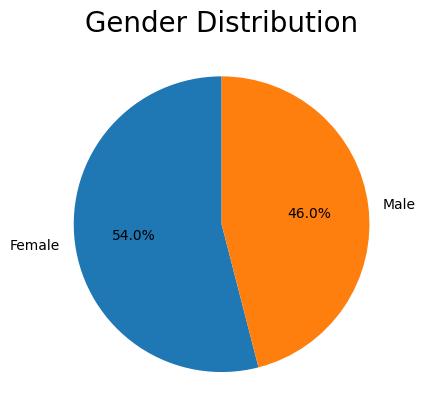

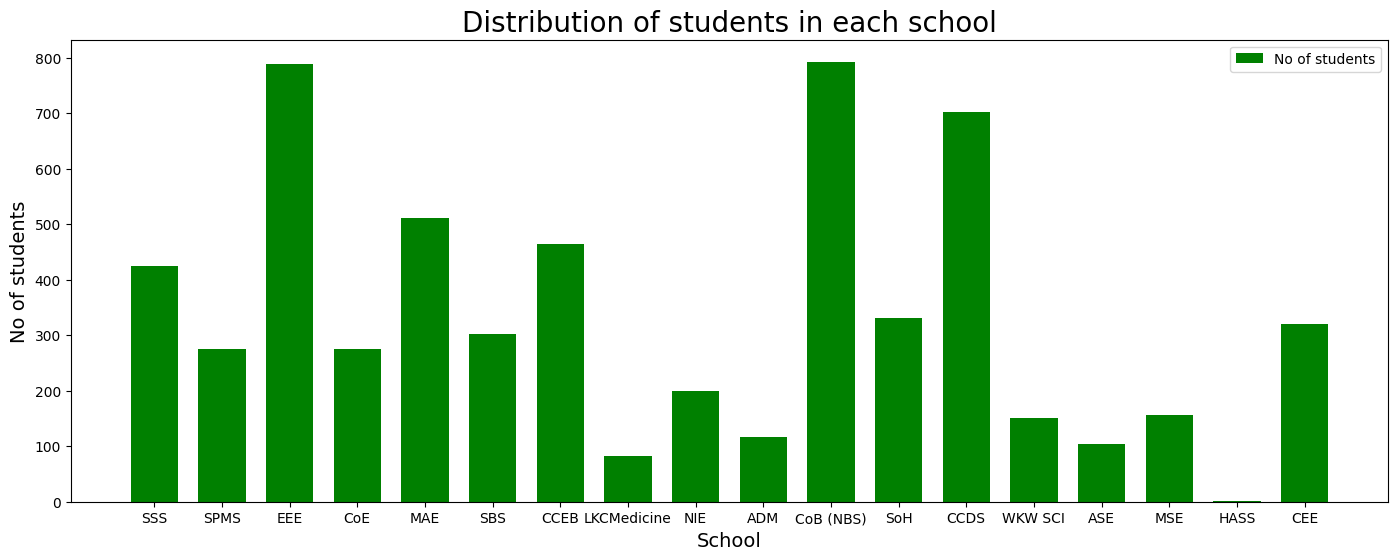

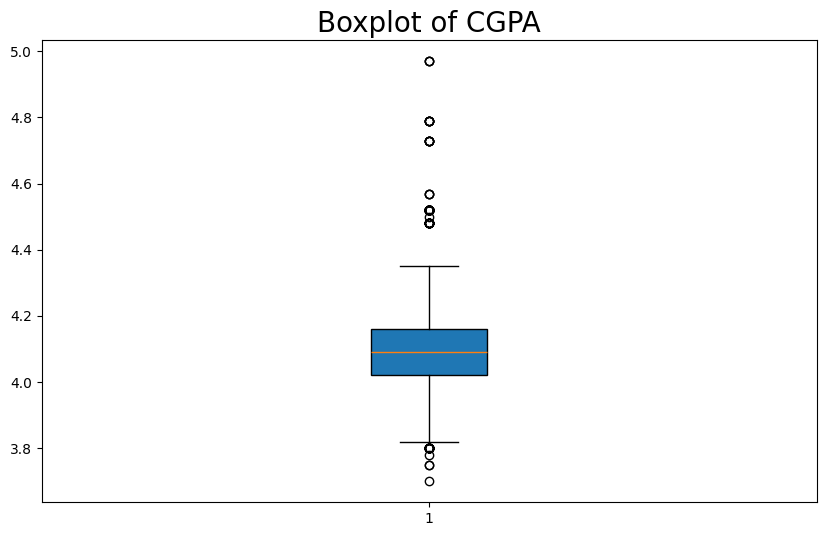

In [9]:
All_raw_list = getdataintolist(studentData)


T_list_all, label_all = data_prep(All_raw_list)

pie_chart(T_list_all[0],label_all[0])
bar_chart(T_list_all[1],label_all[1])
Box_whisker(T_list_all[2])

Function to show graphs of individual tutorial groups

Change number in Graphs_for_TG(x), where **x** represents the tutorial grp

In [10]:
all_tgs = sorted(set(s['TG'] for s in studentData))

def Graphs_for_TG(tg_number,compare = None):
    tg_students = []
    for y in studentData:
        tg = y['TG']
        if tg == tg_number:
            tg_students.append(y)

    T_raw_list = getdataintolist(tg_students)

    T_list_tg,label_tg = data_prep(T_raw_list,compare)

    # #choose which graph to produce
    # if graph_type == 'pie':
    #   pie_chart(T_list_tg[0],label_tg[0])
    # if graph_type == 'bar':
    #    bar_chart(T_list_tg[1],label_tg[1])
    # if graph_type == 'box':
    #     Box_whisker(T_list_tg[2])

    return T_list_tg, label_tg, T_raw_list

T_list_all, label_all, Tg_raw_list = Graphs_for_TG(2, All_raw_list)

# print(T_list_all)

# 4) Design of Algorithm <a id="design"></a>

## 4.1) Sorting Priorities <a id="priorities"></a>
1. School
2. CGPA
3. Gender

We decided on this priority list based on what most strongly influences group dynamics / learning outcomes.

School was placed as the highest priority because we believe that the merit of a group project is the opportunity to experience and work with a diversity of perspectives that you wouldn't otherwise experience in a solo project. Students from different schools provide unique educational backgrounds and problem solving methods which encourages balanced and high quality work. 

CGPA is second priority as it is an indicator of academic performance and work consistency. Prioritising CGPAis crucial to achieve a balanced mix of abilities and ensure that no single group is disproportionately strong or weak academically. However, CGPA is still placed as a lower priority because we believe that CGPA is not wholly representative of one's abilities.

Gender was placed last as a final consideration to maintain inclusivity and promote balanced representation within each group. It acts as a guiding constraint in the algorithm. 

## 4.2) Group Sizes <a id="sizes"></a>
Currently, we are given a simplified version of the problem in which the desired number of students per group ($n$) is $5$ and the existing dataset contains a total of $6000$ students. Since $5|6000$, we can safely make $\frac{6000}{5}=1200$ equal groups of $5$. However, in an extension of this problem, the professor may specify $n$ that does not exactly divide the total number of students in a given dataset.

In this case, we decided to handle the remainder students ($r$) by distributing them, one to each existing group, with the condition that the number of groups with $n$ students is greater than the number of groups with $n+1$ students. In other words, we distribute the students $\text{if }r<\frac{total}{2n}$ (Case 1), else create a separate group of size $r$ (Case 2).

This condition is to ensure that there doesn't arise a case where the professor asks for groups of $n$ but there are finally more groups of $n+1$ than there are groups of $n$ produced by the algorithm. 

The code written below demonstrates how this is implemented:

In [11]:
def createGrps(studentData, n):
    total = len(studentData) # Total number of students 
    r = total % n # Remainder of students when the population is divided into groups of n
    numGrp = total // n if (r <= total/(2 * n)) else total // n + 1 # Number of final groups to be created
        
    # Deciding on the size of each group based on the rules specified
    grpSizes =  [n + 1 if i < r else n for i in range(numGrp)] if (r <= total/(2 * n)) else [r if i == total//n else n for i in range(numGrp)]
    print(f"{grpSizes} Size {len(grpSizes)}")

createGrps(studentData, 100) # Example: Simplified Case - n exactly divides total
createGrps(studentData, 34) # Example: Case 1 
createGrps(studentData, 134) # Example: Case 2 
createGrps(studentData, 261) # Example: Case 2 

[100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100] Size 60
[35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34

## 4.3) Brainstorming: Individual Modular Diversification of Factors <a id="modular"></a>

Before arriving at a final solution, let us decompose the algorithm into its three constituent sections: diversification by CGPA, diversification by school, and diversification by gender. For this, we may come up with individual algorithms / rules to diversify each factor, and later combine the three to arrive at the final algorithm such that the priority order specified above is obeyed. 

### 4.3.1) Considering School Frequency: Diversifying School <a id="school"></a>
To ensure that people in all schools are distributed diversely, we must distribute students in the order of the frequency of their respective schools in the population dataset. In other words, students belonging to schools with a higher number of representatives are distributed first, and those from smaller schools are assigned later.

This approach is logical because schools with larger student counts have a higher likelihood of forming clusters if they are left unregulated. By prioritizing their distribution early, we prevent these large groups from dominating the later stages of assignment, where additional lower priority constraints that are unrelated to school affiliation will take effect. At that point, having students from smaller schools remaining is less risky to diversity than if a large concentration of students from the same school were left unassigned.

The code written below demonstrates how this is implemented. Note that the code discards the other two factors and soley diversifies groups based on the students' schools.

In [12]:
def orderSchool (studentData):
    # Create a sorted list of schools in descending order of population
    schoolCnt = {}
    for student in studentData:
        schoolCnt[student['School']] = schoolCnt.get(student['School'], 0) + 1
    sortedSchools = sorted(schoolCnt.items(), key=lambda x: x[1], reverse=True)

    # Sort students based on the index of their school in sortedSchools 
    sortedStudents = sorted(studentData, key=lambda s: next(i for i, (school, _) in enumerate(sortedSchools) if school == s['School']))

    return [sortedSchools, sortedStudents]

orderedSchool = orderSchool(studentData)
print(orderSchool(studentData)[0], "\n")
for student in orderedSchool[1]:
    print(f"{student['Name']} {student['School']}")

[('CoB (NBS)', 793), ('EEE', 788), ('CCDS', 702), ('MAE', 512), ('CCEB', 465), ('SSS', 425), ('SoH', 332), ('CEE', 321), ('SBS', 302), ('SPMS', 276), ('CoE', 275), ('NIE', 199), ('MSE', 156), ('WKW SCI', 150), ('ADM', 116), ('ASE', 104), ('LKCMedicine', 83), ('HASS', 1)] 

Ajay Verma CoB (NBS)
Areeba Khan CoB (NBS)
Felix Yip CoB (NBS)
Harlow Wang CoB (NBS)
Isabella Thompson CoB (NBS)
Nisha Das CoB (NBS)
Oliver Tan CoB (NBS)
Vivi Dwi CoB (NBS)
Christopher Miller CoB (NBS)
Leo Xu CoB (NBS)
Michael Miller CoB (NBS)
Paula Wong CoB (NBS)
Alina Malik CoB (NBS)
Ameer Bin Rahman CoB (NBS)
Fangling CoB (NBS)
Fergus Mendoza CoB (NBS)
Han Zhang CoB (NBS)
Maya Ong CoB (NBS)
Siti Maryam CoB (NBS)
Yumi Nishikawa CoB (NBS)
Jin Yang Tan CoB (NBS)
Madiha Ali CoB (NBS)
Rachel Choi CoB (NBS)
Sophia Jones CoB (NBS)
Suraj Mishra CoB (NBS)
Gina Lau CoB (NBS)
Kanwal Bukhari CoB (NBS)
Nisha Gupta CoB (NBS)
Chong Wang CoB (NBS)
Samantha Khan CoB (NBS)
Selina Loh CoB (NBS)
Simon Lee CoB (NBS)
Zachary Lee CoB (N

In [13]:
def sortSchool(studentData, n):
    
    total = len(studentData) 
    r = total % n
    numGrp = total // n if (r <= total/(2 * n)) else total // n + 1
    grps = [[] for _ in range(numGrp)]

    students = orderSchool(studentData)[1]
    
    for i, student in enumerate(students): 
        grps[i % numGrp].append(student) # Round-robin distribution of sorted list

    return grps

grps = sortSchool(studentData, 7)
for i, g in enumerate(grps, start=1):
    print(f"Group {i}")
    for s in g:
        print(f"  - {s['Name']}, {s['School']}")

Group 1
  - Ajay Verma, CoB (NBS)
  - Harini Nair, EEE
  - Nash Tan, CCDS
  - Anu Rao, MAE
  - Atsuko Taniguchi, SSS
  - Ronin Smith, CEE
  - Hana Ng, CoE
  - Dorian Yang, HASS
Group 2
  - Areeba Khan, CoB (NBS)
  - Maya Devi, EEE
  - Nitesh Singh, CCDS
  - Cahya Sari, MAE
  - Elijah Wong, SSS
  - Toni Saputra, CEE
  - Jing Yi Tan, CoE
Group 3
  - Felix Yip, CoB (NBS)
  - Shoji Takahashi, EEE
  - Vesper Salazar, CCDS
  - Leah Liu, MAE
  - Jasmine Ng, SSS
  - Haruto Yamamoto, CEE
  - Marwan Bin Ali, CoE
Group 4
  - Harlow Wang, CoB (NBS)
  - Shreya Rani, EEE
  - Yui Yamamoto, CCDS
  - Theo Campbell, MAE
  - Roxanne Chan, SSS
  - Ajay Singh, CEE
  - Nathan Tan, CoE
Group 5
  - Isabella Thompson, CoB (NBS)
  - Tara Lim, EEE
  - Zhonghua, CCDS
  - Elijah Scott, MAE
  - Sania Malik, SSS
  - Emma Bryant, CEE
  - Ravi Deshmukh, CoE
Group 6
  - Nisha Das, CoB (NBS)
  - Zheng Guo, EEE
  - Ashok Patil, CCDS
  - Penny Yip, MAE
  - Sofia Ramirez, SSS
  - Gabriel Morris, CEE
  - Arjun Patel, CoE
Gr

### 4.3.2) Buckets & Cyclic Round-Robin: Diversifying CGPA <a id="cgpa"></a>
To ensure that each group includes a range of CGPAs, we can implement a kind of round-robin distribution. 

To do this, we first sort the group of students in descending order of CGPA, and partition them into approximately homogeneous GPA "buckets" so that we can intuitively label them as ex. "low-GPA", "mid-GPA", "high-GPA", etc. 

Then, the students in each bucket are assigned to groups in a round-robin fashion. If we were to distribute students sequentially within each bucket (i.e., the first student always goes to Group 1, the second to Group 2, and so on), the first group would consistently receive the top students from each bucket. This may result in an unfair imbalance wherein the first group has a noticeably higher average CGPA than, say, the last. To avoid this, we can implement a cyclic distribution on top of the round robin in which the starting index for group assignment shifts each time a new bucket is processed, which ensures that no group consistently receives students from the same position within each bucket.

To visualise, suppose each space separates buckets and each number indicates the group a student is assigned to:
- Without cycling: 0123 0123 0123 0123
- With cycling: 0123 1230 2301 3012

The code written below demonstrates how this is implemented. Note that the code discards the other two factors and soley diversifies groups based on the students' CGPAs.

In [14]:
def GPABucket (studentData, k): # Arbitrary value k to decide size of bucket
    # Sort list in descending order of CGPA
    studentData.sort(key=lambda x: x['CGPA'], reverse=True)
    partition = [studentData[i:i + k] for i in range(0, len(studentData), k)] # Create buckets of size n
    return partition

# Printing buckets in order
partition = GPABucket(studentData, 6)
for index, bucket in enumerate(partition, start=1):
        print(f"\nBucket {index} ({len(bucket)}):")
        for student in bucket:
            print(f"{student['Name']} {student['CGPA']}", end=" ")


Bucket 1 (6):
Hunter Green 4.97 Dante Ong 4.97 Nadia Binti Zain 4.97 Benjamin Hernandez 4.79 Suhana Bhat 4.79 Aira Binti 4.79 
Bucket 2 (6):
Ciara Lim 4.79 Claire Ng 4.79 Sari Rakhmawati 4.79 Maira Binti Rahman 4.73 Yanzhi 4.73 Liyana Binti Mohd 4.73 
Bucket 3 (6):
Yongqiang 4.73 Nabihah Binti Rahman 4.73 Laras Wati 4.73 Matthew Martinez 4.57 Faisal Bin Yusof 4.57 Ravi Mehta 4.57 
Bucket 4 (6):
Layla Torres 4.52 Hae-Jin Lee 4.52 Yasir Ahmad 4.52 Ashok Nair 4.52 Zadie Harris 4.52 Asha Mehta 4.52 
Bucket 5 (6):
Jason Robinson 4.52 Asher Thompson 4.52 Mateo Huang 4.52 Layla Reddy 4.52 Troy Wong 4.52 Nicolas Ramos 4.52 
Bucket 6 (6):
Uriah Howard 4.52 Harper Martinez 4.52 Nitesh Singh 4.52 Fauzi Bin Zain 4.52 Samantha Lee 4.52 Chandra Widyanto 4.52 
Bucket 7 (6):
Aaron Lee 4.52 Priyanka Singh 4.52 Olivia Johnson 4.52 Sadia Khan 4.52 Mi-kyung Han 4.52 Fatima Reddy 4.52 
Bucket 8 (6):
Luna Zhao 4.52 Jin Wei 4.52 Sophia Johnson 4.52 Tristan Smith 4.52 Lola Li 4.52 Tam Nguyen 4.52 
Bucket 9 (

In [15]:
def sortCGPA(studentData, n):

    total = len(studentData) 
    r = total % n
    numGrp = total // n if (r <= total/(2 * n)) else total // n + 1
    grpSizes =  [n + 1 if i < r else n for i in range(numGrp)] if (r <= total/(2 * n)) else [r if i == total//n else n for i in range(numGrp)]
    grps = [[] for _ in range(numGrp)]

    partition = GPABucket(studentData, numGrp)
    
    grpIndex = 0
    for bucketInd, bucket in enumerate(partition):
        startInd = bucketInd % numGrp
        for student in bucket:
            grps[(startInd + grpIndex) % numGrp].append(student)
            grpIndex += 1
    return grps

grps = sortCGPA(studentData, 5)
for i, g in enumerate(grps, start=1):
    print(f"Group {i}")
    for s in g:
        print(f"  - {s['Name']}, {s['CGPA']}")

Group 1
  - Hunter Green, 4.97
  - Layla Zhang, 4.12
  - Dallas Liu, 4.05
  - Rishi Sharma, 4.01
  - Bharat Menon, 3.78
Group 2
  - Dante Ong, 4.97
  - Xing Ying, 4.18
  - Ronald Tan, 4.05
  - Stella James, 4.01
  - Mohammed Sadiq, 3.75
Group 3
  - Nadia Binti Zain, 4.97
  - Megan Tsai, 4.18
  - Mason Reyes, 4.12
  - Kendall Yang, 4.01
  - Fatimah Binti Ahmad, 3.75
Group 4
  - Benjamin Hernandez, 4.79
  - Sophie Zhao, 4.18
  - Anil Reddy, 4.12
  - Kathy Tan, 4.05
  - Rachael Tan, 3.7
Group 5
  - Suhana Bhat, 4.79
  - Stepan Aleksandrov, 4.18
  - Ava Nguyen, 4.12
  - Zedrick Ong, 4.05
  - Ryo Tanaka, 4.01
Group 6
  - Aira Binti, 4.79
  - Ella Harris, 4.18
  - Ruchi Gupta, 4.12
  - Fangling, 4.05
  - Pooja Bhatia, 4.01
Group 7
  - Ciara Lim, 4.79
  - Griffin Yang, 4.18
  - Xanthe Scott, 4.12
  - Raj Patel, 4.05
  - Ritika Iyer, 4.01
Group 8
  - Claire Ng, 4.79
  - Rani Kaur, 4.18
  - Alexander Clark, 4.12
  - Shahril Bin Muni, 4.05
  - Zhou Min, 4.01
Group 9
  - Sari Rakhmawati, 4.79
  -

### 4.3.3) Diversifying Gender <a id="gender"></a>

With the remaining degree of freedom left from CGPA and School, Gender is diversified. To do this, we may assign the number of males & females that can be equally divided between each group first, then assign the remainder (r) of both male and females to the first groups sequentially (which we designed to always hold greater or equal number of students to the last few groups) to try to maintain the same ratio. 

This approach helps the individual group male to female ratio to tend to the population male to female ratio. 

In [16]:
def sortGender(studentData, n):
    total = len(studentData)
    r = total % n
    numGrp = total // n if (r <= total/(2 * n)) else total // n + 1
    grps = [[] for _ in range(numGrp)] 

    # Finding minimum
    totalMale = sum(1 for s in studentData if s['Gender'])
    mMin = totalMale // numGrp # Number of females that can be distributed equally per group
    mRemainder = totalMale % numGrp # Remainder of males after distributing equally

    # Remainder males get populated into the first mRemainder groups
    mIdeal = [mMin] * numGrp
    for i in range(mRemainder):
        mIdeal[i] += 1
    mCurr = [0] * numGrp

    totalFemale = len(studentData) - totalMale
    fMin = totalFemale // numGrp # Number of females that can be distributed equally per group
    fRemainder = totalFemale % numGrp # Remainder of females after distributing equally

    # Remainder females get populated into groups starting from the mRemainder'th index
    fIdeal = [fMin] * numGrp 
    for i in range (mRemainder, mRemainder + fRemainder):
        fIdeal[i % numGrp] += 1
    fCurr = [0] * numGrp

    for student in studentData:
        for g, grp in enumerate(grps):
            if student['Gender'] and mCurr[g] < mIdeal[g]:
                grps[g].append(student)
                mCurr[g] += 1
                break
            elif not student['Gender'] and fCurr[g] < fIdeal[g]:
                grps[g].append(student)
                fCurr[g] += 1
                break
                
    return grps

grps = sortGender(studentData, 11)
popMCount = sum(1 for student in studentData if student['Gender'])
print("M ", popMCount, " F ", len(studentData) - popMCount)
for i, grp in enumerate(grps, start=1):
    mCount = sum(1 for student in grp if student['Gender'])
    fCount = len(grp) - mCount
    print(f"Group {i} - {len(grp)}, ({mCount}, {fCount})")
    for s in grp:
        print(f"  - {s['Name']}, {'M' if s['Gender'] else 'F'}")

M  2759  F  3241
Group 1 - 12, (6, 6)
  - Hunter Green, M
  - Dante Ong, M
  - Nadia Binti Zain, M
  - Benjamin Hernandez, M
  - Suhana Bhat, F
  - Aira Binti, F
  - Ciara Lim, F
  - Claire Ng, F
  - Sari Rakhmawati, F
  - Maira Binti Rahman, F
  - Matthew Martinez, M
  - Faisal Bin Yusof, M
Group 2 - 12, (6, 6)
  - Yanzhi, F
  - Liyana Binti Mohd, F
  - Yongqiang, F
  - Nabihah Binti Rahman, F
  - Laras Wati, F
  - Ravi Mehta, M
  - Layla Torres, F
  - Yasir Ahmad, M
  - Ashok Nair, M
  - Jason Robinson, M
  - Asher Thompson, M
  - Mateo Huang, M
Group 3 - 12, (6, 6)
  - Hae-Jin Lee, F
  - Zadie Harris, F
  - Asha Mehta, F
  - Layla Reddy, F
  - Troy Wong, M
  - Nicolas Ramos, M
  - Uriah Howard, M
  - Harper Martinez, F
  - Nitesh Singh, M
  - Fauzi Bin Zain, M
  - Samantha Lee, F
  - Chandra Widyanto, M
Group 4 - 12, (6, 6)
  - Aaron Lee, M
  - Priyanka Singh, F
  - Olivia Johnson, F
  - Sadia Khan, F
  - Mi-kyung Han, F
  - Fatima Reddy, F
  - Luna Zhao, F
  - Tristan Smith, M
  - 

# 5) Sorting Algorithm <a id="algo"></a>

To combine these individual algorithms, we consider the priorities we set earlier: 1) School, 2) CGPA, 3) Gender. 

Since school is first, we order the list of students in the order of school, as shown in 4.3.1. 

Then, within each school, we order students in terms of CGPA, as shown in 4.3.2. This creates a bucket-like structure as desired, where each group of school acts like an individual bucket. Then, we do a round-robin distribution as intended. Notice that sorting these factors work without any conditional statements, but relies soley on the order of distribution. 

This is key, because the diversification of gender relies on conditionals. This way, we can avoid different conditionals clashing and making distribution even more tedious. 

To diversify gender, we use the same logic as in 4.3.3, appending students to groups depending on the ideal predetermined number of each gender per group. 

In the case that there is an overload of students, we do a second pass sequentially to respect the order of the student list (respect the school & CGPA algorithm) while distributing the remaining students.

The code below shows the final sorting algorithm at work:

In [17]:
def distribute(studentData, n):

    # See 4.2
    total = len(studentData)
    r = total % n
    numGrp = total // n if (r <= total/(2 * n)) else total // n + 1
    grpSizes =  [n + 1 if i < r else n for i in range(numGrp)] if (r <= total/(2 * n)) else [r if i == total//n else n for i in range(numGrp)]
    grps = [[] for _ in range(numGrp)] 

    # See 4.3.1
    schoolCnt = {}
    for s in studentData:
        school = s['School']
        schoolCnt[school] = schoolCnt.get(school, 0) + 1
    sortedSchools = sorted(schoolCnt.keys(), key=lambda x: schoolCnt[x], reverse=True)

    # See 4.3.2
    sortedStudents = sorted(studentData, key=lambda s: (sortedSchools.index(s['School']), -s['CGPA']))

    # See 4.3.3
    totalMale = sum(1 for s in studentData if s['Gender'])
    mMin = totalMale // numGrp
    mRemainder = totalMale % numGrp
    
    mIdeal = [mMin] * numGrp
    for i in range(mRemainder):
        mIdeal[i] += 1
    mCurr = [0] * numGrp
    
    totalFemale = len(studentData) - totalMale
    fMin = totalFemale // numGrp
    fRemainder = totalFemale % numGrp

    fIdeal = [fMin] * numGrp 
    for i in range (mRemainder, mRemainder + fRemainder):
        fIdeal[i % numGrp] += 1
    fCurr = [0] * numGrp

    # Final Distribution 
    grpIndex = 0
    for student in sortedStudents:
        for offset in range(numGrp):
            g = (grpIndex + offset) % numGrp
            if len(grps[g]) < grpSizes[g]:
                if student['Gender'] and mCurr[g] < mIdeal[g]:
                    grps[g].append(student)
                    mCurr[g] += 1
                    break
                elif not student['Gender'] and fCurr[g] < fIdeal[g]:
                    grps[g].append(student)
                    fCurr[g] += 1
                    break
            else:
                g = min(range(numGrp), key=lambda x: len(grps[x]))
                if student['Gender']:
                    grps[g].append(student)
                    mCurr[g] += 1
                    break
                else:
                    grps[g].append(student)
                    fCurr[g] += 1
                    break

        grpIndex += 1
    
    return grps

## Pseudocode for Algorithm

```text
n = 5
finalGrps
FOR each tutorial group in total data
    studentData = data of all students in the tutorial group
    total = number of students in the tutoral group
    r = total % n
    numGrp = 0
    grpSizes = []
    IF r <= total/(2*n)
        numGr = total//n
        i = 0
        WHILE i < numGrp - 1
            IF i < r
                APPEND [n + 1] to grpSizes
            ELSE
                APPEND [n] to grpSizes
            ENDIF
            i = i + 1
        ENDWHILE
    ELSE
        numGr = total//n + 1
        i = 0
        WHILE i < numGrp - 1
            IF i < r
                APPEND [r] to grpSizes
            ELSE
                APPEND [n] to grpSizes
            ENDIF
            i = i + 1
        ENDWHILE
    ENDIF
    
    grps = list of numGrp lists

    FIND number of students from each school
    sortedStudents = studentData sorted in order of students from most populated school to least populated
    FIND total males in studentData
    FIND minimum number of males per group
    FIND remaining males
    mIdeal = list of numGrp lists
    ADD 1 remaining male to each group until all have been distributed
    mCurr = list of numGrp sub lists that each contain the number 0
    
    FIND total females in studentData
    FIND minimum number of females per group
    FIND remaining females
    fIdeal = list of numGrp lists
    ADD 1 remaining female to each group until all have been distributed
    fCurr = list of numGrp sub lists that each contain the number 0

    i = 0
    WHILE i < total - 1
        offset = 0
        student = ith student in sortedStudents
        WHILE offset < numGrp - 1
            g = (i + offset) % numGrp
            IF length of grps[g] < grpSizes[g]
                IF student is male and mCurr[g] < mIdeal[g]
                    APPEND the student to grps[g]
                    mCurr[g] = mCurr[g] + 1
                    BREAK
                ELSE IF student is female and fCurr[g] < fIdeal[g]
                    APPEND the stuent to grps[g]
                    fCurr[g] = fCurr[g] + 1
                    BREAK
                ELSE
                    offset = offset + 1
                ENDIF
            ELSE
                FIND smallest group in grps
                g = index of smallest group
                IF student is male
                    APPEND student to grps[g]
                    mCurr[g] = mCurr[g] + 1
                ELSE
                    APPEND student to grps[g]
                    fCurr[g] = fCurr[g] + 1
                ENDIF
            ENDIF
        ENDWHILE
        i = i + 1
    ENDWHILE
    APPEND grps to finalGrps
ENDFOR

In [18]:
import ipywidgets as widgets
from IPython.display import display

input_n = widgets.IntText(value=5, description='Enter desired number of students per group:', disabled=False)
display(input_n)

IntText(value=5, description='Enter desired number of students per group:')

In [19]:
n = input_n.value

In [20]:
finalAllTgs = []
# Apply algorithm separately to each TG 
all_tgs = sorted(set(s['TG'] for s in studentData))
for tg in all_tgs:
    tgStuds = [s for s in studentData if s['TG'] == tg]
    totalStuds = len(tgStuds)

    # Get TG gender ratio
    mCount_tg = sum(1 for s in tgStuds if s['Gender'])
    fCount_tg = totalStuds - mCount_tg
    mRatio_tg = mCount_tg / totalStuds if totalStuds else 0
    fRatio_tg = 1 - mRatio_tg

    print(f"\nTutorial Group {tg}")
    print(f"Total students: {totalStuds}")
    print(f"Gender ratio: {mCount_tg}M / {fCount_tg}F "
          f"({mRatio_tg:.2%} male, {fRatio_tg:.2%} female)")

    # Get TG school ratio
    schoolDistTG = {}
    for s in tgStuds:
        schoolDistTG[s['School']] = schoolDistTG.get(s['School'], 0) + 1
    sortedSchoolsTG = sorted(schoolDistTG.keys(), key=lambda x: schoolDistTG[x], reverse=True)
    schoolSummary = ", ".join(f"{sch}: {schoolDistTG[sch]}" for sch in sortedSchoolsTG)
    print(f"School distribution: {schoolSummary}")

    # Distribute 
    finalGrps = distribute(tgStuds, n)
    finalAllTgs.append(finalGrps)

    # Print results per grp
    totalInGrps = 0
    for i, g in enumerate(finalGrps, start=1):
        mCount = sum(1 for s in g if s['Gender'])
        fCount = len(g) - mCount
        totalInGrps += len(g)
        avgCGPA = sum(s['CGPA'] for s in g)/len(g)
        print(f"\nGroup {i} (size {len(g)}): Males: {mCount}, Females: {fCount}\nAvgCGPA = {avgCGPA}")
        for s in g:
            print(f"  - {s['Name']} ({s['School']}, {'M' if s['Gender'] else 'F'}, CGPA: {s['CGPA']})")

    print(f"\nTotal assigned in TG{tg}: {totalInGrps} / {totalStuds}")



Tutorial Group 1
Total students: 50
Gender ratio: 21M / 29F (42.00% male, 58.00% female)
School distribution: EEE: 10, CoB (NBS): 8, SSS: 5, SoH: 5, CCDS: 5, MAE: 4, CoE: 3, SPMS: 2, WKW SCI: 2, ASE: 1, CCEB: 1, MSE: 1, ADM: 1, SBS: 1, NIE: 1

Group 1 (size 5): Males: 3, Females: 2
AvgCGPA = 4.168000000000001
  - Adlan Bin Rahman (EEE, M, CGPA: 4.2)
  - Nisha Das (CoB (NBS), F, CGPA: 4.26)
  - Priya Singh (SSS, F, CGPA: 4.17)
  - Ming Zhang (CCDS, M, CGPA: 4.06)
  - Anthony Liu (WKW SCI, M, CGPA: 4.15)

Group 2 (size 5): Males: 1, Females: 4
AvgCGPA = 4.16
  - Xun Wei (EEE, F, CGPA: 4.18)
  - Areeba Khan (CoB (NBS), F, CGPA: 4.19)
  - Lila Patel (SSS, F, CGPA: 4.07)
  - Sana Jain (SPMS, F, CGPA: 4.22)
  - Siddharth Nair (CCEB, M, CGPA: 4.14)

Group 3 (size 5): Males: 2, Females: 3
AvgCGPA = 4.044
  - Henry Foster (EEE, M, CGPA: 4.11)
  - Harlow Wang (CoB (NBS), F, CGPA: 4.18)
  - Truong Minh Chau (SSS, F, CGPA: 3.88)
  - Sakina Ahmed (CCDS, F, CGPA: 4.03)
  - Aarav Singh (CCDS, M, CGP

# 6) Converting Back & Post-Analysis <a id="post"></a>

In [21]:
processedFile = open("FCS4_Team2_EugenePhang.csv", "w")
fileHeader.append("Team Assigned\n") #adds a column to header line
processedFile.write(','.join(fileHeader))   #combines file header list into a string where each column is separated by a ","

for tutGrp in finalAllTgs:
    for grpNum, group in enumerate(tutGrp, start=1):
        for student in group: #on each iteration adds a student's data to csv
            row = f"G-{student['TG']},{student['ID']},{student['School']},{student['Name']},{'Male' if student['Gender'] else 'Female'},{student['CGPA']},{grpNum}\n"
            processedFile.write(row)
processedFile.close()

### Takes a specific Tutorial Group number (e.g., TG 1) and a chosen graph type ('pie', 'bar', or 'box').

Extracts data for each sub-group inside that TG,

Prepares their statistics via helper functions (getdataintolist, data_prep, Graphs_for_TG),

Collects the processed results into data_to_plot,

And finally calls the proper plotting function (pie_chart, bar_chart, Box_whisker, etc.) to visualize the TG’s composition.

In [22]:
def stacked_bar_chart(Grp_datas, y_labels,X_labels):

    print(Grp_datas)
    print(y_labels)
    print(len(X_labels))
    plt.figure(figsize=(17, 6))
    bottoms = [0] * len(X_labels)


    for i in range(0, len(y_labels)):
        plt.bar(X_labels, Grp_datas[i], bottom= bottoms, label = y_labels[i])
        bottoms = [x+y for x,y in zip(Grp_datas[i], bottoms)]
    
    
    plt.xlabel('Schools')
    plt.ylabel('Students')
    plt.title('Distribution of students in Tutorial Group')
    plt.legend()
    plt.show()

In [23]:
def compare_pie_chart(total_grp, label):
    
    # print(label)
    # Create subplots: 1 row, as many columns as there are charts
    fig, axes = plt.subplots(1, len(total_grp), figsize=(10 * len(total_grp), 25))
    
    # If only one pie chart, axes won’t be a list — make it one
    if len(total_grp) == 1:
        axes = [axes]

    # If only one pie chart, axes won’t be a list — make it one
    for i, (ax, group) in enumerate(zip(axes, total_grp), start=1):
        ax.pie(group, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 45})
        ax.set_title(f'Group {i}',fontsize=50)
        ax.axis('equal')

    fig.legend(label,
    loc='lower center',
    title='Categories',
    fontsize=45,
    title_fontsize=50)

    # plt.tight_layout()
    plt.show()


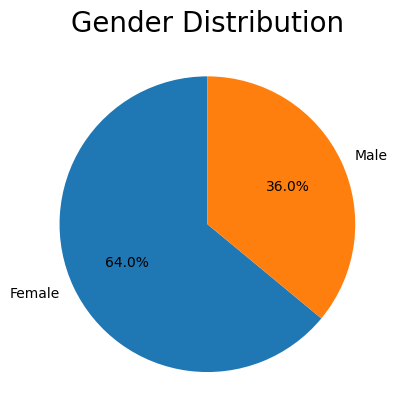

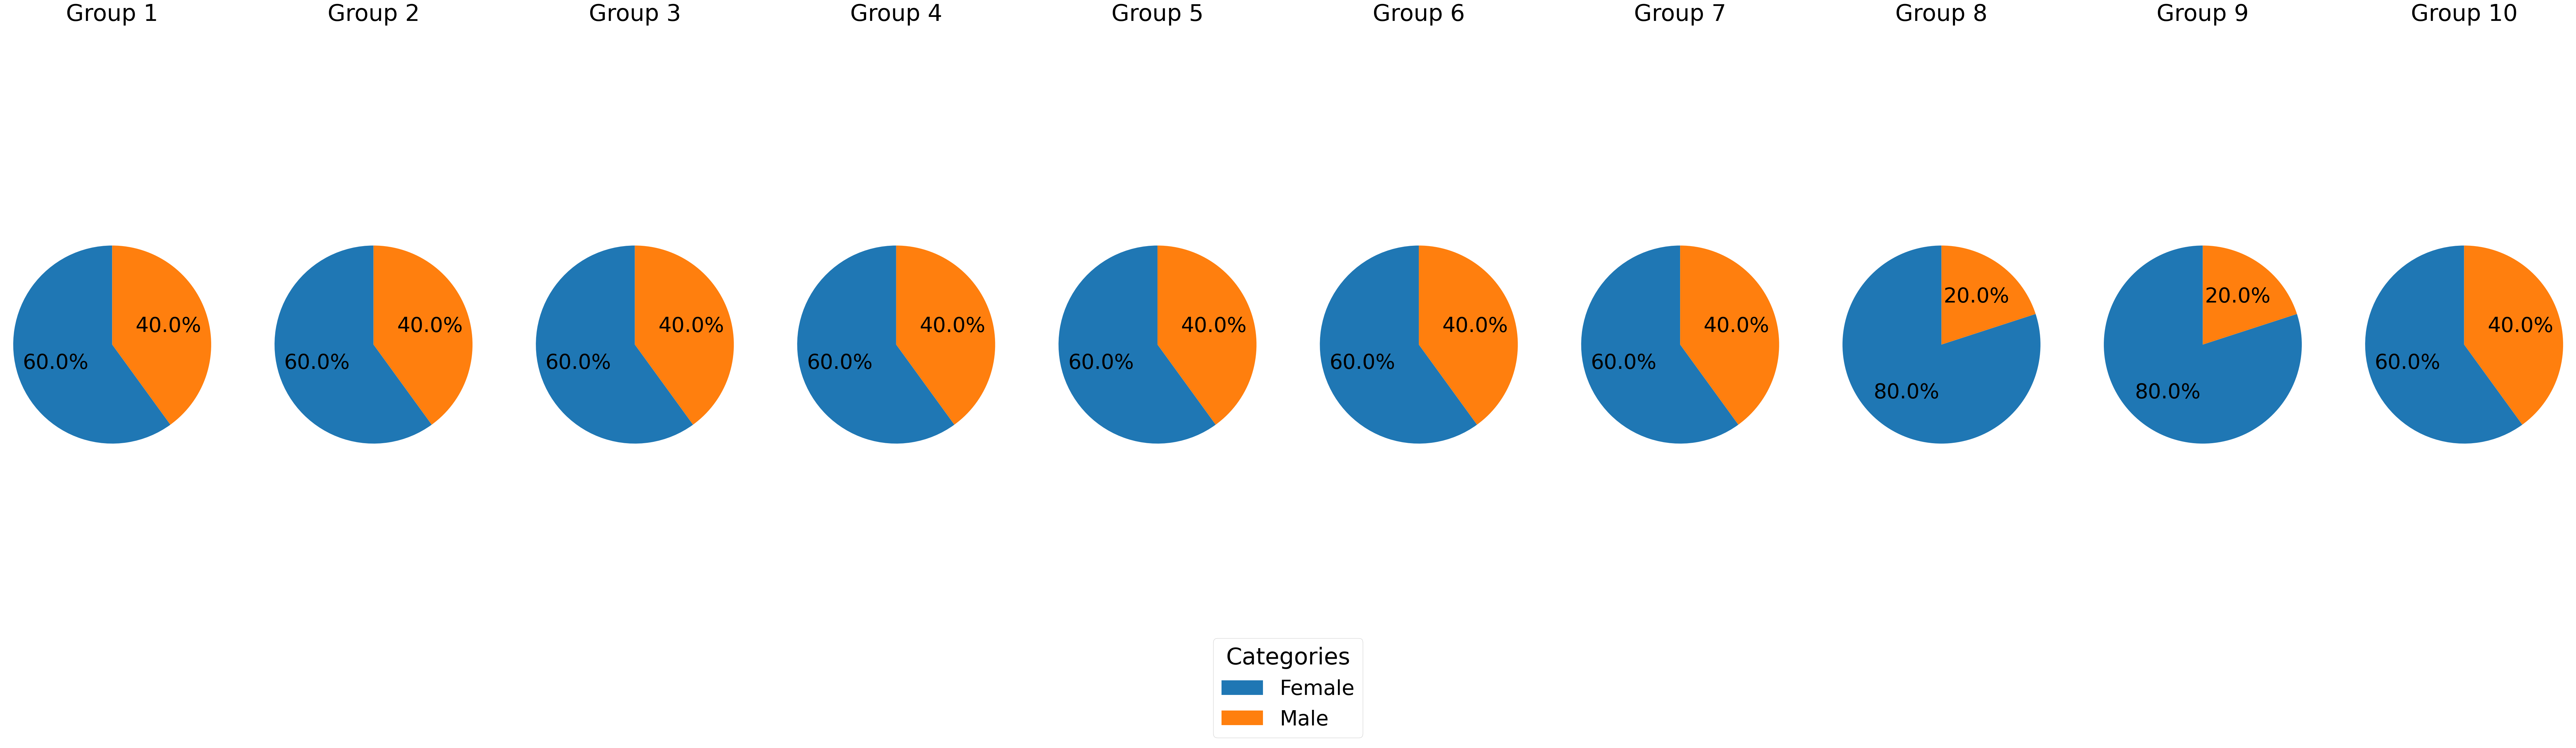

In [42]:
TutGNum = 5
graph_type = 'pie'  #'pie' - pie chart 'bar' - Bar graph 'box' - box&whisker


def GetgrpsGraphs(TutGNum, graph_type):
    no_of_Grps_in_TutG = len(finalAllTgs[TutGNum-1])

    T_list_tg, label_tg, Tg_raw_list = Graphs_for_TG(TutGNum)
    data_to_plot = []
    labels = []


    for i in range(0, no_of_Grps_in_TutG):
        
        
        Tut1Grp1 = finalAllTgs[TutGNum-1][i]
        #print(Tut1Grp1)
        #print(f"For Tutorial Group {TutGNum} - Group {i+1}")
        TutGrp_raw = getdataintolist(Tut1Grp1)
        T_list_tg_grp,label_tg_grp = data_prep(TutGrp_raw,Tg_raw_list)

        labels.append('Group '+str(TutGNum)+'.'+str(i+1))# labels for each group (Group X.1, Group X.2, etc)
        if graph_type == 'pie':
            data_to_plot.append(T_list_tg_grp[0])

        elif graph_type == 'bar':
            data_to_plot.append(T_list_tg_grp[1])
            
        elif graph_type == 'box':
            print(T_list_tg_grp[2])
            data_to_plot.append(T_list_tg_grp[2])  # group all the CGPA lists to plot later
        
        else:
            print("Invalid graph type")
    
    if graph_type == 'box':
        data_to_plot.append(T_list_tg[2])
        Box_whisker(data_to_plot,labels + ['TG '+str(TutGNum)])
        plt.show(block=False)
        # plt.pause(0.001)  # let UI update now

    elif graph_type == "bar":
        bar_chart(T_list_tg[1],label_tg[1])
        stacked_bar_chart(data_to_plot,labels,label_tg[1])
    else:
        pie_chart(T_list_tg[0],label_tg[0])
        compare_pie_chart(data_to_plot,label_tg[0])
        

GetgrpsGraphs(TutGNum, graph_type)

# 7) Algorithm Evaluation: Diversity Index <a id='seven'></a>

## Decomposition and breakdown
### Basic Factors
No majority of students of the same following factors:
1. School
2. Gender
3. Current CGPA

#### Requirements
- Defining what is least diverse for each factor
- Finding least diverse overall
  - Finding least diverse of tutorial group
    - Finding least diverse of group
- Diversity needs to be in regards to the inherent diversity of the tutorial group in order to evaluate the effectiveness of the algorithm
- Visualisation of overall diversity across the board

#### General flow:
- Find the diversity of every tutorial group to use for comparing diversity
- In a tutorial group, check for a single factor first, to find the group with the least diversity
- Then compare them to find the group with the least diversity in the tutorial group
- Repeat for all tutorial groups
- Finally, for each factor, compare the least diverse group of every tutorial group to find least diverse overall

#### Considerations:
- Diversity assessment of group should account for the diversity of the tutorial group it is in
- Using averages could result in a good score when there are similar amounts of good groups and bad groups
    - Hence we chose to evaluate using the worst
    - Histogram shows the distribution of groups for the rest
- Sorting does not feel necessary, as a histogram would show a form of sorting and is a lot more digestible

#### Flowchart:
![Flowchart](assets/flowchart.png)

### Utility function for better visualisation of output data

In [43]:
#dictionaryList : List<dict>
# prints dictionary in a line with spacing between keys, accounts for the length of value
def PrintDictListNice(dictionaryList, spacing : int = 18):
    for i in dictionaryList:
        for k,v in i.items():
            contentLength = 10
            if type(v) is float:
                v = f"{v:.3f}-"
            if type(v) is int:
                contentLength = log10(v) + 1
            else:
                contentLength = len(str(v))
            # elif type(v) is bool:
            #     contentLength = len(str(v))
            print(f"{k}: {v}{' ' * max(spacing - contentLength, 1)}", end = '')
        print()

# log10 : log10\n",
def log10(num : int):
    count = 0
    while num >= 10:
        num /= 10
        count += 1
    return count

## 7.1) Finding the diversity of a single factor of a single group<a id='sevenone'></a>
Required data: list of students in the group, required factor of the student
<br>
Output: The number for diversity
<br>
Start with finding the number of occurences of each factor

Has factor as a parameter for easy scalability and reusability

In [44]:
# Parameters:
#  factor: string of factor to check, same as the key in the dictionary
#  groupData: data needed as a list of dictionaries
# Return:
#  occurences: dictionary of {factor1: numOccurences, factor2: numOccurences ... } as string:int
def FindOccurencesInGroup(factor, groupData : list) -> dict:
    size = len(groupData)
    occurences = {} # Dictionary to keep track of occurences of each factor
    for i in groupData:
        factorOfStudent = i[factor]
        # If factor already exists in occurences, add 1 to it, otherwise create it and set to 1
        if factorOfStudent in occurences.keys():
            occurences[factorOfStudent] += 1
        else:
            occurences[factorOfStudent] = 1
    return occurences

In [45]:
testGroupData = [
    {"Student ID": 71, "TG" : "G-1", "School" : "SoH", "Name" : "Savannah Taylor", "Gender" : False, "CGPA" : 4.19},
    {"Student ID": 75, "TG" : "G-1", "School" : "CCDS", "Name" : "Sakina Ahmed", "Gender" : False, "CGPA" : 4.03},
    {"Student ID": 162, "TG" : "G-1", "School" : "SSS", "Name" : "Lila Patel", "Gender" : False, "CGPA" : 4.07},
    {"Student ID": 235, "TG" : "G-1", "School" : "CCDS", "Name" : "Ming Zhang", "Gender" : True, "CGPA" : 4.06},
    {"Student ID": 288, "TG" : "G-1", "School" : "CoB (NBS)", "Name" : "Ajay Verma", "Gender" : True, "CGPA" : 4.01}
]
print(FindOccurencesInGroup("School", testGroupData))
print(FindOccurencesInGroup("Gender", testGroupData))
print(FindOccurencesInGroup("CGPA", testGroupData))

{'SoH': 1, 'CCDS': 2, 'SSS': 1, 'CoB (NBS)': 1}
{False: 3, True: 2}
{4.19: 1, 4.03: 1, 4.07: 1, 4.06: 1, 4.01: 1}


### Then find the most number of occurences out of the total students

Function to process a dictionary and return the key(s) with the highest value

Design considerations:
- Since we know that this is for finding max occurences, there is no need to consider values that are other datatypes other than int
- Things would be a lot easier if only one of the max is returned, but I decided to return all occurences of the highest as the data that would be lost otherwise is important for getting a clear picture of diversity. For example, there could be 3 schools that are most occuring in the group, but if it showed only 1, there could be a misinterpretation on it being more diverse than it actually is.
- As a result, the output is a more complicated tuple of lists and int which is not bad right now, but this is only a small part that will be used later in larger functions
- For cases where there is only 1 key with highest occurence, I still opted to have it be a single element in a list, as this makes it easier later on, instead of having to care about cases where it outputs a string rather than a list

In [46]:
# Summary: returns the key and value of the key with the largest value
# Parameters:
#  dictionary: the dict to find the max of
# Return:
#  (key : list, value : int) where key is the key(s) with highest value
def FindMaxInDict(dictionary: dict) -> (list, int):
    maxKeys = []
    maxVal = 0
    for key, value in dictionary.items():
        # update maxKeys and maxVal whenever a new value >= current maxVal
        if value > maxVal:
            maxKeys = [key] # Always list for append, and for easier manipulation of data later on
            maxVal = value
        elif value == maxVal:
            maxKeys.append(key)
    return maxKeys, maxVal

In [47]:
print(FindMaxInDict(FindOccurencesInGroup("School", testGroupData)))
print(FindMaxInDict(FindOccurencesInGroup("Gender", testGroupData)))
print(FindMaxInDict(FindOccurencesInGroup("CGPA", testGroupData)))

(['CCDS'], 2)
([False], 3)
([4.19, 4.03, 4.07, 4.06, 4.01], 1)


### 7.1.1) CGPA case <a id='sevenoneone'></a>
But this does not work for CGPA, for that we want to find the mean, range, and midrange instead.
If we only took one of these factors, there would be false positives, so by caring about all of them, it would remove such cases. There will be a higher difficulty in contextualising what the end result is at a glance, but that is solved later.

To be more specific:

If we use only mean, a majority of high CGPA with a very low CGPA will result in a medium CGPA, this can be solved by looking at midrange, where a high difference between midrange and mean will show that this is happening

However, even with these two, a group will all medium CGPAs will also result in medium mean, and low midrange difference, therefore we add range to determine that this is happening if the range is small.

In conclusion, the result we are looking for is one with an medium mean, high range, and low difference between midrange and mean.

Median is also added here as we will be using it later to find students that are above the median, and those below the median.
### Finding mean, midrange, range and median

In [48]:
def Mean(*nums) -> float:
    # Change both types of input, list Mean([1,2,3]) or arbitrary arguments Mean(1,2,3) into the same data structure
    #   so we don't have to account for multiple cases
    # Turns the case of a single list in the tuple into list, different from tuple but we won't need to do anything a list can do that a tuple cannot
    # ([1,2,3],) => [1,2,3]
    # Could do the more correct version of also accounting for cases of Mean([2,3], 3, [5]),
    #   but it should not be necessary for this project, not that this is either
    if len(nums) == 1 and type(nums[0]) is list:
        nums = nums[0]
    return sum(nums) / len(nums)

def Range(*nums) -> float:
    if len(nums) == 1 and type(nums[0]) is list:
        nums = nums[0]
    return max(nums) - min(nums)

def Midrange(*nums) -> float:
    if len(nums) == 1 and type(nums[0]) is list:
        nums = nums[0]
    return (max(nums) + min(nums)) / 2

def Median(*nums) -> float:
    if len(nums) == 1 and type(nums[0]) is list:
        nums = nums[0]
    nums.sort()
    total = len(nums)
    mid = total // 2
    if total % 2:
        return (nums[mid] + nums[mid+1]) / 2
    return nums[mid]

In [49]:
testList = [4.19, 4.03, 4.07, 4.06, 4.01]
print(Mean(testList))
print(Range(testList))
print(Midrange(testList))
print(Median(testList))
print(Mean(1,2,3))

4.072
0.1800000000000006
4.1
4.0649999999999995
2.0


### Calculating for CGPA
Calculate the CGPA diversity score for a single group of students
Takes into account the overall medianCGPA, overall CGPARange
The most diverse possible across every group in a tutorial group would be for every group to be similar to the CGPA statistics of the tutorial group, hence comparing medians and ranges.

It calculates a score of 0 to 100 for each of the factors mean, range, midrange, and balance, applies weights to them, then outputs a final score out of 100.

- Ideal mean is one close to the overall median
- Ideal range is one as large as possible, with the largest being the overall range
- Ideal midrange is one that is as close to mean as possible => similar to balance, it shows that there isn't a low number of lowest (or highest) averaging out everyone else above (or below) average
- Ideal balance is having equal amounts of students above and below the median CGPA.

In [50]:
# Parameters:
#  medianCGPA: median CGPA to use for calculation (likely the tutorial grp's)
#  CGPARange: Range of CGPA to use for calculation (likely the tutorial grp's)
#  groupData: list of studentData to find CGPA diversity (likely a group within the tut grp)
# Return:
#  score: overall score of CGPA
#  cGPADetails: dictionary of {factor: percent} e.g. the factor "balance" is (students with higher CGPA than median - students with lower CGPA than median)
def CalculateCGPADiversity(medianCGPA : float, CGPARange : float, *groupData) -> (int, dict):
    if len(groupData) == 1 and type(groupData[0]) is list:
        groupData = groupData[0]

    cGPADetails = {}
    # Calculate higher and lowers
    lower = higher = 0
    cGPAs = ExtractCGPA(groupData)
    for gpa in cGPAs:
        if gpa < medianCGPA:
            lower += 1
        elif gpa > medianCGPA:
            higher += 1
    cGPADetails["balance"] = higher - lower

    # Calculate the score for each factor
    cGPADetails["mean"] = Mean(cGPAs)
    cGPADetails["range"] = Range(cGPAs)
    cGPADetails["midrange"] = Midrange(cGPAs)

    # Score 0 to 100, 100 is most diverse possible
    # Usage of 5 as is prevalent as it is the max CGPA and max difference between lowest and highest CGPA
    
    # vv How close mean is to the median vv
    cGPADetails["meanScore"] = (5 - abs(cGPADetails["mean"] - medianCGPA)) * 20
    # vv Ratio of grp's range and tutorial grp's range vv
    cGPADetails["rangeScore"] = cGPADetails["range"] / CGPARange * 100
    # vv How far midrange is from mean vv   most diverse ==> mean of x, midrange of x
    cGPADetails["midrangeScore"] = (1 - abs(cGPADetails["mean"] - cGPADetails["midrange"])) * 100
    # vv Lowest: score = 0 when abs(balance) = Num of grp members, Highest: score = 100 when balance = 0 vv 
    cGPADetails["balanceScore"] = (len(groupData) - abs(cGPADetails["balance"])) / len(groupData) * 100
    
    # Overall score out of 100
    # Weightages for what we consider more important
    W_RANGE = 1.2 # Range is important to have for educational value of learning from weaker/stronger students
    W_MIDRANGE = 0.75 # Midrange and balance are looking for similar features of having a balance of number of people on both sides of the median so lower weightage
    W_MEAN = 1.5 # We consider mean the most important in regards to having a balanced team and existence of "magnitude of capability" to be able to learn from each other
    W_BALANCE = 0.75

    # Final calculation of score to change it into a range of 0-100 with regards to weight
    score = (cGPADetails["meanScore"] * W_MEAN\
             + cGPADetails["rangeScore"] * W_RANGE\
             + cGPADetails["midrangeScore"] * W_MIDRANGE\
             + cGPADetails["balanceScore"] * W_BALANCE) / sum([W_MEAN, W_RANGE, W_MIDRANGE, W_BALANCE])
    return score, cGPADetails

# Returns a list of CGPAs of the students in groupData => Makes it easier to calculate median and mean
def ExtractCGPA(*groupData) -> list:
    if len(groupData) == 1 and type(groupData[0]) is list:
        groupData = groupData[0]

    cGPAs = []
    for i in groupData:
        cGPAs.append(i["CGPA"])
    return cGPAs

# Returns a list of CGPAs of the students in groupData => Makes it easier to calculate median and mean
def TutGrpExtractCGPA(tutGroupData) -> list:
    cGPAs = []
    for i in tutGroupData:
        cGPAs.extend(ExtractCGPA(i))
    return cGPAs

In [51]:
# Testing the code above to check it works

testGroupData = finalAllTgs[5] # Easy to change if this variable used from another section changes

# Calculate median and range of tutorial group
medianCGPA = Median(TutGrpExtractCGPA(testGroupData))
rangeCGPA = Range(TutGrpExtractCGPA(testGroupData))
print(medianCGPA)
# Print all the data of the result of the function above
for i in range(len(testGroupData)):
    print(f"test group: {i}")
    PrintDictListNice(testGroupData[i])
    print()
    result = CalculateCGPADiversity(medianCGPA, rangeCGPA, testGroupData[i])
    print("Score: ", result[0])
    PrintDictListNice([result[1]])
# print(testGroupData)


4.09
test group: 0
ID: 4182              TG: 6                 School: EEE               Name: Meera Rao         Gender: False             CGPA: 4.260-            
ID: 5070              TG: 6                 School: CoB (NBS)         Name: Alyssa Wong       Gender: False             CGPA: 4.180-            
ID: 1827              TG: 6                 School: SoH               Name: Miranda Chang     Gender: False             CGPA: 4.020-            
ID: 1716              TG: 6                 School: SPMS              Name: Rajesh Iyer       Gender: True              CGPA: 4.000-            
ID: 2883              TG: 6                 School: WKW SCI           Name: Ryo Tanaka        Gender: True              CGPA: 4.010-            

Score:  75.0884498480243
balance: -1                 mean: 4.094-            range: 0.260-            midrange: 4.130-            meanScore: 99.920-           rangeScore: 27.660-           midrangeScore: 96.400-           balanceScore: 80.000-           


## 7.2) Calculating the factors for each group <a id='seventwo'></a>
Combine all the previous functions together to obtain the data for the least diverse of each factor and which group(s) they belong to

For each factor, iterate through the groups to calculate their diversity and store the least diverse
<br>
Return the least diverse of each factor and the tutorial groups they belong to

Considerations:
- Change of considering number of occurences to considering percentage of occurence as the groups may not have the same number of students
- The data structure of return values, I decided to split it into two as just returning the factor is already a dictionary which value is a tuple with a list. Example:
```
  {'School': ([['EEE'], ['EEE'], ['CoB (NBS)', 'SoH', 'CCDS']],
   0.2857142857142857),
  'Gender': ([[False]], 0.7142857142857143),
  'CGPA': ([['CGPA score']], 77.10824703015533)}

  {'School': [1, 2, 3], 'Gender': [5], 'CGPA': [5]}
```
- The alternative consideration was to add another index to the tuple for the tutorial groups, but I decided that `leastDiverse[Factor][2][0]` was more confusing than `grpIdx[Factor][0]`
- If the data struct for the most common factor was not a list of lists, there would be no way to separate which list of factors belong to which tutorial group, in the example, EEE is most common for both groups 1 and 2, without the extra lists, EEE, CoB (NBS) could be mistaken as the most common for group 2

In [52]:
# Parameters:
#  factors: list of strings of factor to check, same as the key in the dictionary
#  groupsDatas: List of datas needed as a list(TG) of list(groups) of dictionaries(studentData)
# Return:
#  leastDiverse: dictionary of {factor1: occurencesPercent, factor2: occurencesPercent ... } as string:int
#  grpIdx: dictionary of the grps that have the least diversity for the factor {factor1: groups}
def FindLeastDiverseInTutorialGroup(factors, groupsDatas) -> (dict, dict):
    # Get data required for calculating diversity score for CGPA
    allCGPA = TutGrpExtractCGPA(testGroupData)
    tutMedianCGPA = Median(allCGPA)
    tutRangeCGPA = Range(allCGPA)
    
    grpIdx = {}
    leastDiverse = {}
    for factor in factors:
        # Set default value to replace
        leastDiverseOccurence = (["factorResult"], 0) # % of highest occurence, i.e. 90% of students are from ccds
        if factor == "CGPA":
            leastDiverseOccurence = (["CGPA score"], 100)
        currentGrpIdx = 0
        for group in groupsDatas:
            # Special CGPA case
            if factor == "CGPA":
                result = CalculateCGPADiversity(tutMedianCGPA, tutRangeCGPA, group) # result is (score : float, details : dictionary)
                occurence = [["CGPA score"], result[0]]
                currentPercent = occurence[1]
            else:
                occurence = FindMaxInDict(FindOccurencesInGroup(factor, group)) # result is ([least diverse factors(i.e. CCDS, False)], occurence count)
                currentPercent = occurence[1] / len(group)
            # Less diverse so replace
            if (factor != "CGPA" and currentPercent > leastDiverseOccurence[1])\
            or (factor == "CGPA" and currentPercent < leastDiverseOccurence[1]): # Special CGPA case where currentPercent is CGPA diversity score, so want the lowest
                leastDiverseOccurence = ([occurence[0]], currentPercent)
                grpIdx[factor] = [currentGrpIdx]
            # Same diversity so append
            elif currentPercent == leastDiverseOccurence[1]:
                 # because list in tuples cannot append\n",
                leastDiverseOccurence0 = []
                leastDiverseOccurence0 = (leastDiverseOccurence[0])
                leastDiverseOccurence0.append(occurence[0])
                
                leastDiverseOccurence = (leastDiverseOccurence0, currentPercent)
                grpIdx[factor].append(currentGrpIdx)
            currentGrpIdx += 1
        leastDiverse[factor] = leastDiverseOccurence
    return leastDiverse, grpIdx

### Put it into a function that prints out all the data

Format the output with a function to make it easier to change in the future

In [53]:
# Parameters:
#  groupsData: List of datas needed as a list of dictionaries -> Tutorial group
# Return: (same as function FindLeastDiverseInTutorialGroup)
#  leastDiverse: dictionary of {factor1: occurencesPercent, factor2: occurencesPercent ... } as string:int
#  grpIdx: dictionary of the grps that have the least diversity for the factor {factor1: groups}
def PrintResultForTutorialGroup(groupData) -> (dict, dict):
    allCGPA = TutGrpExtractCGPA(groupData)
    tutMedianCGPA = Median(allCGPA)
    tutRangeCGPA = Range(allCGPA)
    for i in range(len(groupData)):
        print(f"group: {i}")
        PrintDictListNice(groupData[i])
        print()
        result = CalculateCGPADiversity(medianCGPA, rangeCGPA, groupData[i])
        print("CGPA Score: ", result[0], end="\n\n")
    data = FindLeastDiverseInTutorialGroup(["School", "Gender", "CGPA"], groupData)
    PrintFactorNice(data)
    return data

# data : the return of FindLeasstDiverseInTutorialGroup\n",
def PrintFactorNice(data : (dict, dict)):
    for factor in data[0].keys():
        percentOrScore = f"{data[0][factor][1]:.2f}" if factor == "CGPA" else f"{data[0][factor][1] * 100 :.2f}%"
        print(FormatFactors(f"Most common {factor}(s): {data[0][factor][0]} at {percentOrScore} found in group(s): {data[1][factor]}"))

def FormatFactors(string : str):
    output = string.replace("Most common CGPA", "Lowest CGPA diversity score")\
                    .replace("[['CGPA score']] at ", "")\
                    .replace("],", " |")\
                    .replace("True", "Male")\
                    .replace("False", "Female")\
                    .replace("[", "")\
                    .replace("]", "")
    return output

# Test
PrintResultForTutorialGroup(finalAllTgs[4])

group: 0
ID: 564               TG: 5                 School: CoB (NBS)         Name: Qi Wang           Gender: False             CGPA: 4.250-            
ID: 1952              TG: 5                 School: EEE               Name: Riya Ali          Gender: False             CGPA: 4.150-            
ID: 3231              TG: 5                 School: CCDS              Name: Xiaofang          Gender: False             CGPA: 4.150-            
ID: 4931              TG: 5                 School: SPMS              Name: Lucas White       Gender: True              CGPA: 4.060-            
ID: 999               TG: 5                 School: CoE               Name: Marcus Turner     Gender: True              CGPA: 3.880-            

CGPA Score:  78.45691489361701

group: 1
ID: 4472              TG: 5                 School: CoB (NBS)         Name: Ying Chen         Gender: False             CGPA: 4.220-            
ID: 2028              TG: 5                 School: EEE               Name: Har

({'School': ([['SSS'], ['SPMS'], ['CCDS']], 0.4),
  'Gender': ([[False], [False]], 0.8),
  'CGPA': ([['CGPA score']], 66.70911854103343)},
 {'School': [4, 6, 9], 'Gender': [7, 8], 'CGPA': [7]})

## 7.3) Calculating for every tutorial group <a id='seventhree'></a>
Calculate and print out the results for every group in every tutorial group
Also collects the lowest diversity results of every tutorial group for later use

But first, the data structure is getting complicated, so a refresher on how it currently looks like

In [54]:
# How the variable for data of all students sorted into grps looks like
for TG in range(len(finalAllTgs)):
    for grp in range(len(finalAllTgs[TG])):
        PrintDictListNice(finalAllTgs[TG][grp])
        print()
# List(finalAllTgs) of lists(TG) of lists(grp) of dictionaries(studentData)

ID: 2091              TG: 1                 School: EEE               Name: Adlan Bin Rahman  Gender: True              CGPA: 4.200-            
ID: 809               TG: 1                 School: CoB (NBS)         Name: Nisha Das         Gender: False             CGPA: 4.260-            
ID: 1271              TG: 1                 School: SSS               Name: Priya Singh       Gender: False             CGPA: 4.170-            
ID: 235               TG: 1                 School: CCDS              Name: Ming Zhang        Gender: True              CGPA: 4.060-            
ID: 3989              TG: 1                 School: WKW SCI           Name: Anthony Liu       Gender: True              CGPA: 4.150-            

ID: 3930              TG: 1                 School: EEE               Name: Xun Wei           Gender: False             CGPA: 4.180-            
ID: 1383              TG: 1                 School: CoB (NBS)         Name: Areeba Khan       Gender: False             CGPA: 4.1

In [55]:
allGroupData = finalAllTgs # finalAllTgs[TG][grp] is list of students(dict)

# all TG's least diverse, global variables to store the data for use later
# This mimics the output of funtion `FindLeastDiverseInTutorialGroup`
allTG_LD = [] # list of dictionaries of {factor: ([most repeated], occurence percentage/CGPA score)}
allTG_LD_Idx = [] # list of dictionaries of {factor: [idx*]}

# Each loop processes and prints a single TG
for TG in range(len(finalAllTgs)):
    currentTGData = finalAllTgs[TG]
    tgLD = {} # least diverse in TG, {factor: percentage}
    tgLDIdx = -1
    data = PrintResultForTutorialGroup(currentTGData)
    print(data)
    print(end="\n\n")

    # Add data to global variables
    tgLD = data[0]
    tgLDIdx = data[1]
    allTG_LD.append(tgLD)
    allTG_LD_Idx.append(tgLDIdx)

group: 0
ID: 2091              TG: 1                 School: EEE               Name: Adlan Bin Rahman  Gender: True              CGPA: 4.200-            
ID: 809               TG: 1                 School: CoB (NBS)         Name: Nisha Das         Gender: False             CGPA: 4.260-            
ID: 1271              TG: 1                 School: SSS               Name: Priya Singh       Gender: False             CGPA: 4.170-            
ID: 235               TG: 1                 School: CCDS              Name: Ming Zhang        Gender: True              CGPA: 4.060-            
ID: 3989              TG: 1                 School: WKW SCI           Name: Anthony Liu       Gender: True              CGPA: 4.150-            

CGPA Score:  66.09331306990879

group: 1
ID: 3930              TG: 1                 School: EEE               Name: Xun Wei           Gender: False             CGPA: 4.180-            
ID: 1383              TG: 1                 School: CoB (NBS)         Name: Are

## 7.4) Printing all the factors and finding the least diverse overall with regards to composition of tutorial group <a id='sevenfour'></a>
Requires getting the statistics of the overall tutorial group to compare with the group

### 7.4.1) Finding Theoretical best school distribution when disregarding other factors <a id='sevenfourone'></a>

Could reuse the FindLeastDiverseInTutorialGroup() with sortSchool(), but it is inefficient, and sortSchool has to work with the rest of the sorting algorithms, so it is not the most optimal possible

Instead, math will be used, the base case is the most diverse is distributing the highest school count(highestSchCnt) evenly. Then the group with the most amount of students from this school is found by `ceil(highestSchCnt / grpNum)`

Then, groups with extra students have to be taken into account, as when `highestSchCnt % grpNum` is higher than number of extra students, there will be groups with extra students and groups without extra students both sharing simiilar highest number of students with the same school. While when it is not higher, we have to compare highest occurence in group with extra and highest-1 occurence in group without extra.

In [56]:
def ceil(num : float):
    return num // 1 + (1 if num % 1 > 0 else 0)

# tg_studentData : List of student data in a TG
# returns: lowestDiversity : the group with the lowest diversity in the theoretical best grouping for only school
def TheoreticalBestForSchool_LD(tg_studentData) -> list:
    # Easiest way by reusing old functions, but inefficient
    # data = FindLeastDiverseInTutorialGroup(["School"], sortSchool(tg_studentData, n))

    # Instead, find most common school and divide by num of groups
    # Find highest school count in TG
    highestSchCnt = orderSchool(tg_studentData)[0][0][1]

    # For analysis later
    secondHighestSchCnt = orderSchool(tg_studentData)[0][1][1]
    # print(orderSchool(tg_studentData)[0][0][1])

    # Calculate number of groups in TG
    total = len(tg_studentData) 
    r = total % n
    numGrp = total // n if (r <= total/(2 * n)) else total // n + 1

    # The most number of repeated sch in a grp will be from the most common sch being evenly distributed as much as possible
    # Leading to ceil(highest sch count / grps) 
    maxRepeat = ceil(highestSchCnt / numGrp)

    # The percentage would then be maxRepeat / n
    remainder = highestSchCnt % numGrp
    data = maxRepeat / n 
    # But we need to account for groups with extra members
    # print(maxRepeat, n, remainder, r)
    if r > 0 and r <= total/(2 * n): # Don't care for case 2 of group nums
        data2 = maxRepeat / (n + 1)
        if remainder > r or remainder == 0:
            data = max(data, data2) # case of maxRepeat / n does exists and might be less diverse 
        elif remainder <= r:
            data = data2 # case of maxRepeat / n does not exist 
            
    return data

TBestSchLD = []
hasDiscrepency = False # For checking against brute force method
for tg in all_tgs:
    tgStuds = [s for s in studentData if s['TG'] == tg]
    # Check if it is correct by comparing it with the bruteforce method
    byBruteforce = FindLeastDiverseInTutorialGroup(["School"], sortSchool(tgStuds, n))[0]["School"][1]
    byMath = TheoreticalBestForSchool_LD(tgStuds)
    # if byBruteforce != byMath:
        # sortSch = sortSchool(tgStuds, n)
        # for i in sortSch:
        #     PrintDictListNice(i)
        #     print()
    print(f"{byBruteforce} vs {byMath}", end="\n\n")
    hasDiscrepency = True
        
    TBestSchLD.append(byMath)
print(hasDiscrepency)

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.4 vs 0.4

0.4 vs 0.4

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.4 vs 0.4

0.2 vs 0.2

0.4 vs 0.4

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.4 vs 0.4

0.2 vs 0.2

0.2 vs 0.2

0.4 vs 0.4

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.4 vs 0.4

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.4 vs 0.4

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.4 vs 0.4

0.2 vs 0.2

0.4 vs 0.4

0.4 vs 0.4

0.4 vs 0.4

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.4 vs 0.4

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.2 vs 0.2

0.2 

There is a case where reusing `sortSchool()` is not the optimal outcome due to `sortSchool()` needing to work with other factors as well. The case is when there is more than 1 most common school. But it is not shown when for n=5.

### 7.4.2) Calculating gender ratio of every TG group <a id='sevenfourtwo'></a>
Simple iteration and calculating of `totalMale / number_of_students` 

In [57]:
allGenderRatio = []
for tg in all_tgs:
    tgStuds = [s for s in studentData if s['TG'] == tg]
    totalMale = sum(1 for s in tgStuds if s['Gender'])
    allGenderRatio.append(totalMale/len(tgStuds))
print(allGenderRatio)

[0.42, 0.36, 0.5, 0.32, 0.36, 0.4, 0.54, 0.44, 0.48, 0.52, 0.46, 0.48, 0.44, 0.48, 0.58, 0.46, 0.5, 0.38, 0.5, 0.46, 0.42, 0.46, 0.5, 0.58, 0.38, 0.38, 0.4, 0.46, 0.5, 0.5, 0.5, 0.48, 0.42, 0.48, 0.4, 0.58, 0.42, 0.4, 0.36, 0.44, 0.46, 0.48, 0.54, 0.52, 0.44, 0.52, 0.48, 0.52, 0.42, 0.54, 0.4, 0.4, 0.46, 0.4, 0.56, 0.38, 0.42, 0.42, 0.42, 0.46, 0.42, 0.5, 0.5, 0.52, 0.44, 0.52, 0.44, 0.44, 0.5, 0.36, 0.38, 0.56, 0.4, 0.48, 0.46, 0.44, 0.4, 0.44, 0.44, 0.56, 0.42, 0.58, 0.6, 0.4, 0.4, 0.46, 0.46, 0.54, 0.5, 0.46, 0.52, 0.52, 0.44, 0.38, 0.6, 0.42, 0.32, 0.58, 0.42, 0.44, 0.5, 0.44, 0.5, 0.4, 0.48, 0.48, 0.38, 0.5, 0.4, 0.4, 0.54, 0.4, 0.44, 0.34, 0.46, 0.52, 0.4, 0.58, 0.44, 0.54]


## 7.5) Combining everything to print the least diverse of every tutorial group and additionally least diverse overall with respect to difference from tutorial group <a id='sevenfive'></a>

Iterate through everything and find the lowest

In [58]:
# Refresher of how the data looks like
print(allTG_LD[0])
print(allTG_LD_Idx[0])

{'School': ([['CCDS'], ['SoH']], 0.4), 'Gender': ([[False]], 0.8), 'CGPA': ([['CGPA score']], 64.50569908814586)}
{'School': [2, 5], 'Gender': [1], 'CGPA': [1]}


In [59]:
# Least diverse overall of each factor [score/percentage, [TG(s)], deviation from TG stats]
LD_CGPA = [100, [-1]]
LD_School = [0, [-1], 0]
LD_Gender = [0, [-1], 0]


#List to be used for graph later
school_diff_list  = []
gender_diff_list  = []
cgpa_score_list   = []

# Each loop processes 1 TG
# note: variable `tg` is -1 of actual Tutorial Group
for tg in range(len(allTG_LD)):
    # Print the data nicely
    print(f"Tutorial group: {tg+1}:")
    PrintFactorNice((allTG_LD[tg], allTG_LD_Idx[tg]))
    print(end="\n\n")

    # Find the least diverse overall, with regards to composition of tutorial group

    # School
    current_SchoolD = allTG_LD[tg]["School"]
    # Calculate difference between TG stats and grp stats
    difference = abs(TBestSchLD[tg] - current_SchoolD[1])
    school_diff_list.append(abs(TBestSchLD[tg] - current_SchoolD[1])) #Add to list for graphing

    # Less diverse, so replace
    if difference > LD_School[2] or LD_School[1][0] == -1: # need to init the variable in case first comparison has a delta of 0
        LD_School = [current_SchoolD[1], [tg+1], difference]
    # Same diversity, so add
    elif difference == LD_School[2]:
        LD_School[1].append(tg+1)
        
    # Gender
    current_GenderD = allTG_LD[tg]["Gender"]
    # Calculate difference between TG stats and grp stats, have to convert to male%
    maleP = current_GenderD[1] if current_GenderD[0][0][0] else (1 - current_GenderD[1])
    difference = abs(allGenderRatio[tg] - maleP)
    gender_diff_list.append(abs(allGenderRatio[tg] - maleP)) #Add to list for graphing

    # Less diverse, so replace
    if difference > LD_Gender[2] or LD_Gender[1][0] == -1: # need to init the variable in case first comparison has a delta of 0
        LD_Gender = [current_GenderD[1], [tg+1], difference]
    # Same diversity, so add
    elif difference == LD_Gender[2]:
        LD_Gender[1].append(tg+1)

    # CGPA
    current_CGPA = allTG_LD[tg]["CGPA"]
    cgpa_score_list.append(current_CGPA[1]) #Add to list for graphing

    # Less diverse, so replace
    if current_CGPA[1] < LD_CGPA[0]:
        LD_CGPA = [current_CGPA[1], [tg+1]]
    # Same diversity, so add
    elif current_CGPA[1] == LD_CGPA[0]:
        LD_CGPA[1].append(tg+1)
        
print(f"Least diverse overall")
print(f"School: Difference of {LD_School[2]*100 :.2f} between theoretical most optimal({TBestSchLD[LD_School[1][0]]*100 :.2f}%) and \
least school diverse group({LD_School[0]*100 :.2f}%) from tutorial group(s): {LD_School[1]}")
print(f"Gender: Difference of {LD_Gender[2] * 100 :.2f} between gender ratio of TG({allGenderRatio[LD_Gender[1][0]-1] * 100 :.2f} % male) and \
least gender diverse group({LD_Gender[0] * 100 :.2f}% {"male" if allTG_LD[LD_Gender[1][0]-1]["Gender"][0][0][0] else "female"}) from tutorial group(s): {LD_Gender[1]}")
print(f"CGPA: Score of {LD_CGPA[0] :.2f} from tutorial group(s): {LD_CGPA[1]}")

SyntaxError: f-string: expecting '}' (1158753297.py, line 64)

### Reusing functions to check the groups with lowest diversity

In [60]:
tgs = [1, 67, 59]
for i in tgs:
    tg = i-1
    print(f"Tutorial group: {tg+1}:")
    PrintResultForTutorialGroup(finalAllTgs[tg])
    # PrintFactorNice((allTG_LD[tg], allTG_LD_Idx[tg]))
    print()

Tutorial group: 1:
group: 0
ID: 2091              TG: 1                 School: EEE               Name: Adlan Bin Rahman  Gender: True              CGPA: 4.200-            
ID: 809               TG: 1                 School: CoB (NBS)         Name: Nisha Das         Gender: False             CGPA: 4.260-            
ID: 1271              TG: 1                 School: SSS               Name: Priya Singh       Gender: False             CGPA: 4.170-            
ID: 235               TG: 1                 School: CCDS              Name: Ming Zhang        Gender: True              CGPA: 4.060-            
ID: 3989              TG: 1                 School: WKW SCI           Name: Anthony Liu       Gender: True              CGPA: 4.150-            

CGPA Score:  66.09331306990879

group: 1
ID: 3930              TG: 1                 School: EEE               Name: Xun Wei           Gender: False             CGPA: 4.180-            
ID: 1383              TG: 1                 School: CoB (NBS

The 100% male group happens when accounting for other more important factors

The following is without accounting for other factors:

In [61]:
tg = 67
testytest = []
for grp in finalAllTgs[tg-1]:
    testytest.extend(grp)
count = -1
testData = sortGender(testytest, n)
for i in testData:
    count += 1
    print(f"group {count}:")
    PrintDictListNice(i)
    print()

FindLeastDiverseInTutorialGroup(["Gender"],testData)

group 0:
ID: 4977              TG: 67                School: CoB (NBS)         Name: Alexander Adams   Gender: True              CGPA: 4.230-            
ID: 4473              TG: 67                School: CCDS              Name: Jett Brown        Gender: True              CGPA: 4.200-            
ID: 5973              TG: 67                School: CoE               Name: Dev Raj           Gender: True              CGPA: 4.230-            
ID: 2219              TG: 67                School: CoE               Name: Olivia Lee        Gender: False             CGPA: 4.120-            
ID: 716               TG: 67                School: SoH               Name: Sanya Maheshwari  Gender: False             CGPA: 4.000-            

group 1:
ID: 3966              TG: 67                School: WKW SCI           Name: Owen Hall         Gender: True              CGPA: 4.220-            
ID: 3153              TG: 67                School: WKW SCI           Name: Xue Ying          Gender: True     

({'Gender': ([[True],
    [True],
    [False],
    [False],
    [False],
    [False],
    [False],
    [False],
    [False],
    [False]],
   0.6)},
 {'Gender': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [62]:
#allTG_LD[LD_Gender[1][0]-1]["Gender"][0][0][0]
current_GenderD[1]
# LD_School[1]
# TBestSchLD[LD_School[1][0]]*100
# LD_School[1][0]*100

NameError: name 'current_GenderD' is not defined

# 8) Graphical plots of School, Gender and CGPA Diversity <a id='plots'></a>

What the Histogram Shows:
- CGPA	- How evenly distributed academic performance is across groups  
- Gender	- How balanced the male/female ratio is  
- School	- How mixed the educational background composition is\n  


In [63]:
def diversity_histograms(school_diff_list, gender_diff_list, cgpa_score_list):
    plt.figure(figsize=(10, 10))

    # 1️⃣ School
    plt.subplot(3, 1, 1)
    plt.hist(school_diff_list, bins=10, edgecolor='black', color='#55efc4', alpha=0.8)
    plt.title("School Diversity Differences")
    plt.xlabel("Difference from Ideal Diversity")
    plt.ylabel("Frequency")

    # 2️⃣ Gender
    plt.subplot(3, 1, 2)
    plt.hist(gender_diff_list, bins=10, edgecolor='black', color='#ffeaa7', alpha=0.8)
    plt.title("Gender Diversity Differences")
    plt.xlabel("Difference from Ideal Diversity")
    plt.ylabel("Frequency")

    # 3️⃣ CGPA
    plt.subplot(3, 1, 3)
    plt.hist(cgpa_score_list, bins=10, edgecolor='black', color='#74b9ff', alpha=0.8)
    plt.title("CGPA Diversity Scores")
    plt.xlabel("Score")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

# Call once for all three
diversity_histograms(school_diff_list, gender_diff_list, cgpa_score_list)

NameError: name 'school_diff_list' is not defined

## 8.1) Intepretation <a id='interp'></a>

School histogram: shows how many tutorial groups deviate by certain % from the ideal school mix.

Gender histogram: shows how balanced groups are by male/female ratio.

CGPA histogram: shows how academic diversity is distributed across groups.

# 9) Challenges and Issues <a id='challenges'></a>

- Problems with showing two different types of data in one graph for comparision for data analysis
- Wrapping my head around how to implement a process (especially the CGPA bucket round robin) into code
- Combining the three modularised distribution algorithms in a workable way while respecting set priorities and not sacrificing too much diversity on the individual components
- Jupyter notebook with git results in tons of merge conflicts because of it being a giant JSon, especially with execution_count, output, and when moving around cells. Outputs are also so large that they make it hard to find merge conflicts that matter. Eventually we worked around part of it by pushing only after removing the output.
- Data types get complicated with the lists in lists in dictionaries, what does `leastDiverse[0]["School"][1]` mean for example, not intuitive at a glance
- Finding an objective way to show that it is the most diverse (Pareto fronts, but too difficult to implement)

# 10) Conclusion <a id='conc'></a>

Although we cannot rigorously prove that it is the most diverse group allocation possible, we managed to produce a result we deem diverse enough given the circumstances of having to balance multiple factors with varying importance to education.

## Declaration of use of AI tools

A. I affirm that my contribution(s) to the lab work is my own, produced without help
from any AI tool(s)<br>
B. I affirm that my contribution(s) to the lab work has been produced with the help
from AI tool(s)

|Full name|Date|A or B|
| :---- | :--- | :-: |
|Chaehui Kim|10/11/2025|A|
|Eugene Phang|10/11/2025|A|
|Abhinav Kiran Korety|10/11/2025|A|
|Kwan Wei Yin Joel|10/11/2025|A|
|Daniel Sutjipto|10/11/2025|A|